In [ ]:
import zipfile
import os

# Extract the ZIP file
zip_file_path = '/content/archive.zip'  # Adjust name if different
extract_path = '/content/healthcare_data/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List extracted files
print("Extracted files:")
for root, dirs, files in os.walk(extract_path):
    for file in files:
        print(os.path.join(root, file))

Extracted files:
/content/healthcare_data/dirty_v3_path.csv


In [ ]:
# Install necessary libraries
!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow keras imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [ ]:
import os
import zipfile

# First, let's see what files are in the content directory
print("Files in /content/:")
for item in os.listdir('/content/'):
    print(item)

print("\n" + "="*50 + "\n")

# Find the ZIP file
zip_files = [f for f in os.listdir('/content/') if f.endswith('.zip')]
print(f"ZIP files found: {zip_files}")

if zip_files:
    zip_path = f'/content/{zip_files[0]}'
    print(f"\nExtracting: {zip_path}")

    # Extract ZIP
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall('/content/')

    print("\nExtracted successfully!")

print("\n" + "="*50 + "\n")

# Now list all files again to find the CSV
print("All files after extraction:")
for root, dirs, files in os.walk('/content/'):
    for file in files:
        if file.endswith('.csv'):
            full_path = os.path.join(root, file)
            print(f"CSV found: {full_path}")

Files in /content/:
.config
healthcare_data
archive.zip
sample_data


ZIP files found: ['archive.zip']

Extracting: /content/archive.zip

Extracted successfully!


All files after extraction:
CSV found: /content/dirty_v3_path.csv
CSV found: /content/healthcare_data/dirty_v3_path.csv
CSV found: /content/sample_data/california_housing_test.csv
CSV found: /content/sample_data/mnist_test.csv
CSV found: /content/sample_data/mnist_train_small.csv
CSV found: /content/sample_data/california_housing_train.csv


In [ ]:
# Load the correct CSV file
df = pd.read_csv('/content/dirty_v3_path.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\n" + "="*80 + "\n")

print("First few rows:")
print(df.head(10))
print("\n" + "="*80 + "\n")

print("Dataset Info:")
print(df.info())
print("\n" + "="*80 + "\n")

print("Basic Statistics:")
print(df.describe())
print("\n" + "="*80 + "\n")

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print(f"\nTotal Missing Values: {df.isnull().sum().sum()}")
print("\n" + "="*80 + "\n")

# Check data types
print("Data Types:")
print(df.dtypes)

Dataset Shape: (30000, 20)

Column Names:
['Age', 'Gender', 'Medical Condition', 'Glucose', 'Blood Pressure', 'BMI', 'Oxygen Saturation', 'LengthOfStay', 'Cholesterol', 'Triglycerides', 'HbA1c', 'Smoking', 'Alcohol', 'Physical Activity', 'Diet Score', 'Family History', 'Stress Level', 'Sleep Hours', 'random_notes', 'noise_col']


First few rows:
    Age  Gender Medical Condition  Glucose  Blood Pressure    BMI  \
0  46.0    Male          Diabetes   137.04          135.27  28.90   
1  22.0    Male           Healthy    71.58          113.27  26.29   
2  50.0     NaN            Asthma    95.24             NaN  22.53   
3  57.0     NaN           Obesity      NaN          130.53  38.47   
4  66.0  Female      Hypertension    95.15          178.17  31.12   
5  50.0    Male      Hypertension   107.00          171.80  25.33   
6  80.0    Male      Hypertension      NaN          174.52  29.87   
7  50.0    Male            Cancer      NaN          136.13  26.37   
8  60.0  Female           Obesi

In [ ]:
# Check unique values in suspicious columns
print("Unique values in 'random_notes':")
print(df['random_notes'].unique())
print("\nUnique values in 'Medical Condition' (our target):")
print(df['Medical Condition'].value_counts())

print("\n" + "="*80 + "\n")

# Remove noise columns
df_clean = df.drop(['random_notes', 'noise_col'], axis=1)
print(f"Dataset shape after removing noise columns: {df_clean.shape}")

Unique values in 'random_notes':
['lorem' 'ipsum' '###' '??']

Unique values in 'Medical Condition' (our target):
Medical Condition
Hypertension    7120
Diabetes        6417
Obesity         3857
Healthy         3039
Asthma          2037
Arthritis       1796
Cancer          1234
Name: count, dtype: int64


Dataset shape after removing noise columns: (30000, 18)


Target Variable: Medical Condition

Class Distribution:
Medical Condition
Hypertension    7120
Diabetes        6417
Obesity         3857
Healthy         3039
Asthma          2037
Arthritis       1796
Cancer          1234
Name: count, dtype: int64

Class Distribution (%):
Medical Condition
Hypertension    27.921569
Diabetes        25.164706
Obesity         15.125490
Healthy         11.917647
Asthma           7.988235
Arthritis        7.043137
Cancer           4.839216
Name: proportion, dtype: float64


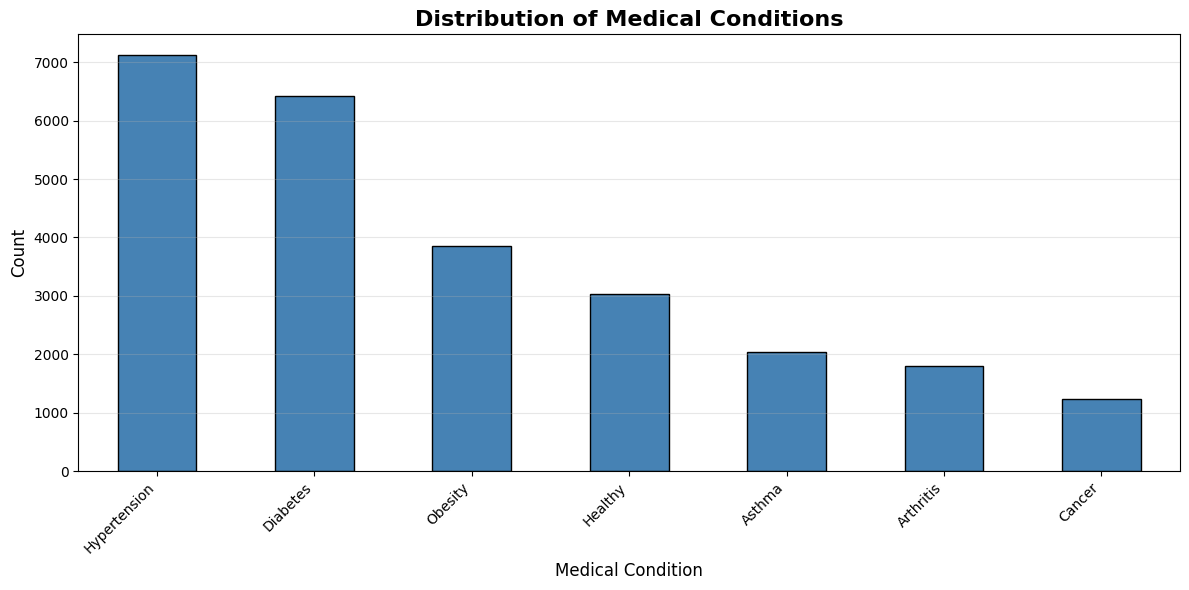

In [ ]:
# Analyze target variable
target_col = 'Medical Condition'

print(f"Target Variable: {target_col}")
print(f"\nClass Distribution:")
print(df_clean[target_col].value_counts())
print(f"\nClass Distribution (%):")
print(df_clean[target_col].value_counts(normalize=True) * 100)

# Visualize class distribution
plt.figure(figsize=(12, 6))
df_clean[target_col].value_counts().plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Distribution of Medical Conditions', fontsize=16, fontweight='bold')
plt.xlabel('Medical Condition', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Check missing values pattern
print("Missing Values Summary:")
missing_summary = pd.DataFrame({
    'Column': df_clean.columns,
    'Missing_Count': df_clean.isnull().sum(),
    'Missing_Percentage': (df_clean.isnull().sum() / len(df_clean)) * 100
})
missing_summary = missing_summary[missing_summary['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_summary)

print("\n" + "="*80 + "\n")

# Strategy: Remove rows with missing target variable, then impute features
print("Removing rows where target variable (Medical Condition) is missing...")
df_clean = df_clean.dropna(subset=[target_col])
print(f"Dataset shape after removing missing targets: {df_clean.shape}")

print("\nRemaining missing values:")
print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

Missing Values Summary:
                              Column  Missing_Count  Missing_Percentage
Age                              Age           4500                15.0
Gender                        Gender           4500                15.0
Medical Condition  Medical Condition           4500                15.0
Glucose                      Glucose           4500                15.0
Blood Pressure        Blood Pressure           4500                15.0


Removing rows where target variable (Medical Condition) is missing...
Dataset shape after removing missing targets: (25500, 18)

Remaining missing values:
Age               3821
Gender            3794
Glucose           3788
Blood Pressure    3800
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer

# Separate features by type
numerical_features = ['Age', 'Glucose', 'Blood Pressure', 'BMI', 'Oxygen Saturation',
                      'Cholesterol', 'Triglycerides', 'HbA1c', 'Physical Activity',
                      'Diet Score', 'Stress Level', 'Sleep Hours']

categorical_features = ['Gender']

# Impute numerical features with median
print("Imputing numerical features with median...")
num_imputer = SimpleImputer(strategy='median')
df_clean[numerical_features] = num_imputer.fit_transform(df_clean[numerical_features])

# Impute categorical features with mode
print("Imputing categorical features with mode...")
cat_imputer = SimpleImputer(strategy='most_frequent')
df_clean[categorical_features] = cat_imputer.fit_transform(df_clean[categorical_features])

print("\nMissing values after imputation:")
print(df_clean.isnull().sum().sum())


Imputing numerical features with median...
Imputing categorical features with mode...

Missing values after imputation:
0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode Gender
le_gender = LabelEncoder()
df_clean['Gender_Encoded'] = le_gender.fit_transform(df_clean['Gender'])
print("Gender Encoding:")
print(dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_))))

# Encode Target Variable (Medical Condition)
le_target = LabelEncoder()
df_clean['Target_Encoded'] = le_target.fit_transform(df_clean[target_col])

print("\nMedical Condition Encoding:")
target_mapping = dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))
for condition, code in target_mapping.items():
    print(f"  {condition}: {code}")

# Save mapping for later interpretation
print(f"\nNumber of classes: {len(le_target.classes_)}")

Gender Encoding:
{'Female': np.int64(0), 'Male': np.int64(1)}

Medical Condition Encoding:
  Arthritis: 0
  Asthma: 1
  Cancer: 2
  Diabetes: 3
  Healthy: 4
  Hypertension: 5
  Obesity: 6

Number of classes: 7


In [ ]:
# Define feature columns (excluding original categorical and target)
feature_columns = ['Age', 'Gender_Encoded', 'Glucose', 'Blood Pressure', 'BMI',
                   'Oxygen Saturation', 'LengthOfStay', 'Cholesterol', 'Triglycerides',
                   'HbA1c', 'Smoking', 'Alcohol', 'Physical Activity', 'Diet Score',
                   'Family History', 'Stress Level', 'Sleep Hours']

X = df_clean[feature_columns].values
y = df_clean['Target_Encoded'].values

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"Number of features: {len(feature_columns)}")
print(f"Number of classes: {len(np.unique(y))}")

Feature matrix shape: (25500, 17)
Target vector shape: (25500,)
Number of features: 17
Number of classes: 7


In [ ]:
from sklearn.model_selection import train_test_split

# Split data: 70% train, 15% validation, 15% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.176, random_state=42, stratify=y_temp)
# 0.176 of 0.85 ≈ 0.15 of total

print("Dataset Split:")
print(f"  Training set:   {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"  Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"  Test set:       {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

# Check class distribution in splits
print("\nClass distribution in splits:")
print(f"Train: {np.bincount(y_train)}")
print(f"Val:   {np.bincount(y_val)}")
print(f"Test:  {np.bincount(y_test)}")

Dataset Split:
  Training set:   17860 samples (70.0%)
  Validation set: 3815 samples (15.0%)
  Test set:       3825 samples (15.0%)

Class distribution in splits:
Train: [1258 1427  864 4494 2129 4987 2701]
Val:   [ 269  305  185  960  454 1065  577]
Test:  [ 269  305  185  963  456 1068  579]


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform all sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("Feature Scaling Complete!")
print(f"Training set scaled shape: {X_train_scaled.shape}")
print(f"\nSample statistics after scaling (first 5 features):")
print("Mean:", X_train_scaled[:, :5].mean(axis=0))
print("Std: ", X_train_scaled[:, :5].std(axis=0))

Feature Scaling Complete!
Training set scaled shape: (17860, 17)

Sample statistics after scaling (first 5 features):
Mean: [-2.18190527e-18 -7.24237144e-16 -6.72780545e-15  4.33722611e-14
 -7.23554599e-15]
Std:  [1. 1. 1. 1. 1.]


In [ ]:
print("\n" + "="*80)
print("DATA PREPROCESSING SUMMARY")
print("="*80)
print(f" Original dataset: 30,000 samples, 20 features")
print(f" Removed noise columns: random_notes, noise_col")
print(f" Cleaned dataset: {df_clean.shape[0]} samples, {len(feature_columns)} features")
print(f" Target variable: Medical Condition ({len(np.unique(y))} classes)")
print(f" Missing values: Imputed")
print(f" Categorical encoding: Complete")
print(f" Train/Val/Test split: {X_train.shape[0]}/{X_val.shape[0]}/{X_test.shape[0]}")
print(f" Feature scaling: Standardized")
print("="*80)

# Save processed data info
print("\nKey variables ready for modeling:")
print("  - X_train_scaled, y_train")
print("  - X_val_scaled, y_val")
print("  - X_test_scaled, y_test")
print("  - feature_columns (list of feature names)")
print("  - le_target (label encoder for interpreting predictions)")


DATA PREPROCESSING SUMMARY
 Original dataset: 30,000 samples, 20 features
 Removed noise columns: random_notes, noise_col
 Cleaned dataset: 25500 samples, 17 features
 Target variable: Medical Condition (7 classes)
 Missing values: Imputed
 Categorical encoding: Complete
 Train/Val/Test split: 17860/3815/3825
 Feature scaling: Standardized

Key variables ready for modeling:
  - X_train_scaled, y_train
  - X_val_scaled, y_val
  - X_test_scaled, y_test
  - feature_columns (list of feature names)
  - le_target (label encoder for interpreting predictions)


Deep Neural Network Model Building




In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Model parameters
input_dim = X_train_scaled.shape[1]  # 17 features
num_classes = len(np.unique(y))  # 7 classes

print(f"Input dimension: {input_dim}")
print(f"Number of classes: {num_classes}")
print("\n" + "="*80 + "\n")

# Build Deep Neural Network
model = Sequential([
    # Input Layer + First Hidden Layer
    Dense(128, activation='relu', input_shape=(input_dim,), name='dense_1'),
    BatchNormalization(name='bn_1'),
    Dropout(0.3, name='dropout_1'),

    # Second Hidden Layer
    Dense(256, activation='relu', name='dense_2'),
    BatchNormalization(name='bn_2'),
    Dropout(0.4, name='dropout_2'),

    # Third Hidden Layer
    Dense(128, activation='relu', name='dense_3'),
    BatchNormalization(name='bn_3'),
    Dropout(0.3, name='dropout_3'),

    # Fourth Hidden Layer
    Dense(64, activation='relu', name='dense_4'),
    BatchNormalization(name='bn_4'),
    Dropout(0.2, name='dropout_4'),

    # Output Layer
    Dense(num_classes, activation='softmax', name='output')
])

print("Model Architecture:")
model.summary()

Input dimension: 17
Number of classes: 7


Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 128)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_1 (BatchNormalization)       │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_2 (BatchNormalization)       │ (None, 256)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_3 (BatchNormalization)       │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_4 (BatchNormalization)       │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,239 (309.53 KB)

 Trainable params: 78,087 (305.03 KB)

 Non-trainable params: 1,152 (4.50 KB)

In [ ]:
# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',  # For integer labels
    metrics=['accuracy']
)

print("\n Model compiled successfully!")
print(f"  Optimizer: Adam (lr=0.001)")
print(f"  Loss: Sparse Categorical Crossentropy")
print(f"  Metrics: Accuracy")


 Model compiled successfully!
  Optimizer: Adam (lr=0.001)
  Loss: Sparse Categorical Crossentropy
  Metrics: Accuracy


In [ ]:
# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

callbacks = [early_stopping, reduce_lr, model_checkpoint]

print("\n Callbacks configured:")
print("  - Early Stopping (patience=15)")
print("  - Learning Rate Reduction (patience=5)")
print("  - Model Checkpoint (best validation accuracy)")


 Callbacks configured:
  - Early Stopping (patience=15)
  - Learning Rate Reduction (patience=5)
  - Model Checkpoint (best validation accuracy)


In [ ]:
# Train the model
print("\n" + "="*80)
print("STARTING MODEL TRAINING")
print("="*80 + "\n")

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

print("\n" + "="*80)
print("TRAINING COMPLETE!")
print("="*80)


STARTING MODEL TRAINING

Epoch 1/100
557/559 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6755 - loss: 0.9570
Epoch 1: val_accuracy improved from -inf to 0.88467, saving model to best_model.keras
559/559 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.6760 - loss: 0.9555 - val_accuracy: 0.8847 - val_loss: 0.3209 - learning_rate: 0.0010
Epoch 2/100
558/559 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8417 - loss: 0.4494
Epoch 2: val_accuracy improved from 0.88467 to 0.89174, saving model to best_model.keras
559/559 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.8417 - loss: 0.4494 - val_accuracy: 0.8917 - val_loss: 0.2960 - learning_rate: 0.0010
Epoch 3/100
558/559 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8598 - loss: 0.4097
Epoch 3: val_accuracy improved from 0.89174 to 0.89725, saving model to best_model.keras
559/559 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8598 - loss: 0.4097 - val_accuracy: 0.8972 - val_loss: 0.2870 - learning_rate: 0.0010
Epoch 4/100
547/559

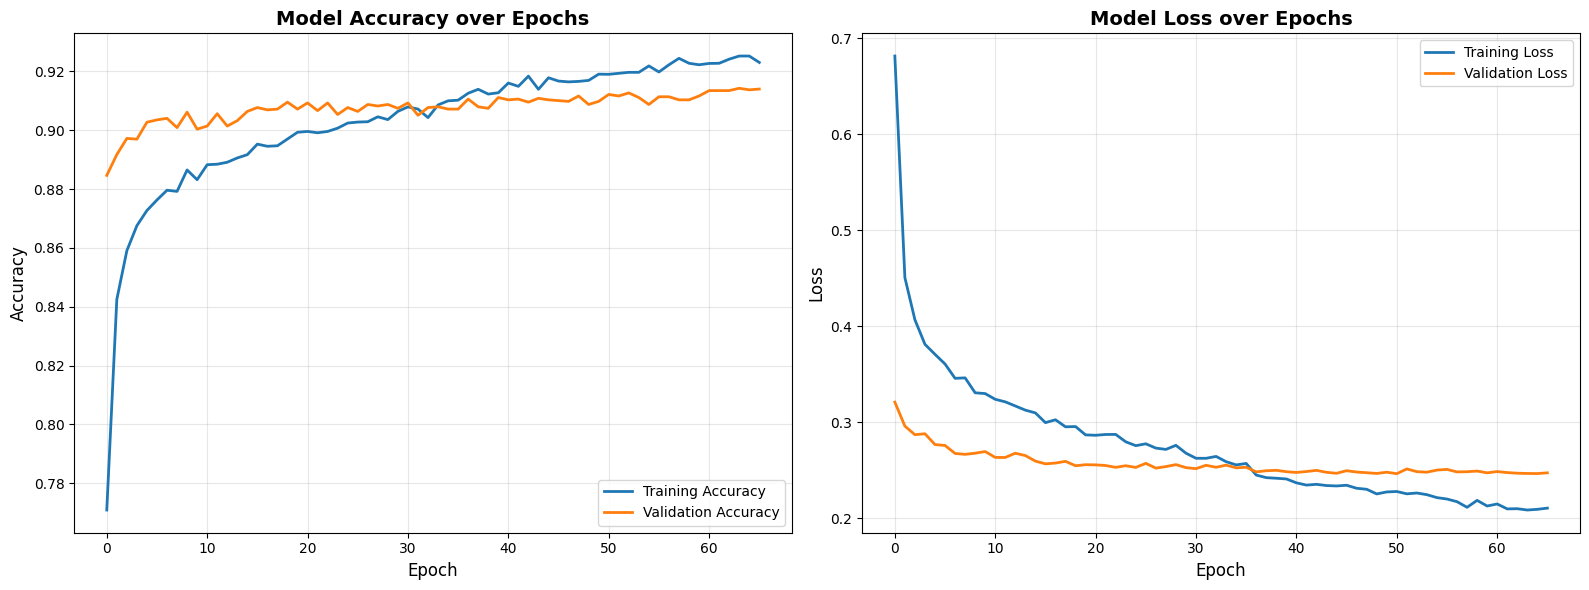


Best Epoch: 64
Best Validation Accuracy: 0.9143
Best Validation Loss: 0.2466


In [ ]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0].set_title('Model Accuracy over Epochs', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].legend(loc='lower right', fontsize=10)
axes[0].grid(True, alpha=0.3)

# Plot loss
axes[1].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[1].set_title('Model Loss over Epochs', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].legend(loc='upper right', fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print best results
best_epoch = np.argmax(history.history['val_accuracy'])
print(f"\nBest Epoch: {best_epoch + 1}")
print(f"Best Validation Accuracy: {history.history['val_accuracy'][best_epoch]:.4f}")
print(f"Best Validation Loss: {history.history['val_loss'][best_epoch]:.4f}")

In [ ]:
# Evaluate on test set
print("\n" + "="*80)
print("EVALUATING ON TEST SET")
print("="*80 + "\n")

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")


EVALUATING ON TEST SET

Test Loss: 0.2311
Test Accuracy: 0.9187 (91.87%)


In [ ]:
# Make predictions on test set
y_pred_proba = model.predict(X_test_scaled, verbose=0)
y_pred = np.argmax(y_pred_proba, axis=1)

print("\nPrediction Summary:")
print(f"  Total test samples: {len(y_test)}")
print(f"  Correctly predicted: {np.sum(y_pred == y_test)}")
print(f"  Incorrectly predicted: {np.sum(y_pred != y_test)}")
print(f"  Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Prediction Summary:
  Total test samples: 3825
  Correctly predicted: 3514
  Incorrectly predicted: 311
  Accuracy: 0.9187


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
print("\n" + "="*80)
print("CLASSIFICATION REPORT")
print("="*80 + "\n")

target_names = le_target.classes_
report = classification_report(y_test, y_pred, target_names=target_names, digits=4)
print(report)


CLASSIFICATION REPORT

              precision    recall  f1-score   support

   Arthritis     0.7810    0.7026    0.7397       269
      Asthma     0.9582    0.9016    0.9291       305
      Cancer     0.9628    0.9784    0.9705       185
    Diabetes     0.9660    0.9450    0.9554       963
     Healthy     0.9805    0.9912    0.9858       456
Hypertension     0.8862    0.9185    0.9021      1068
     Obesity     0.8796    0.9085    0.8938       579

    accuracy                         0.9187      3825
   macro avg     0.9163    0.9065    0.9109      3825
weighted avg     0.9186    0.9187    0.9183      3825



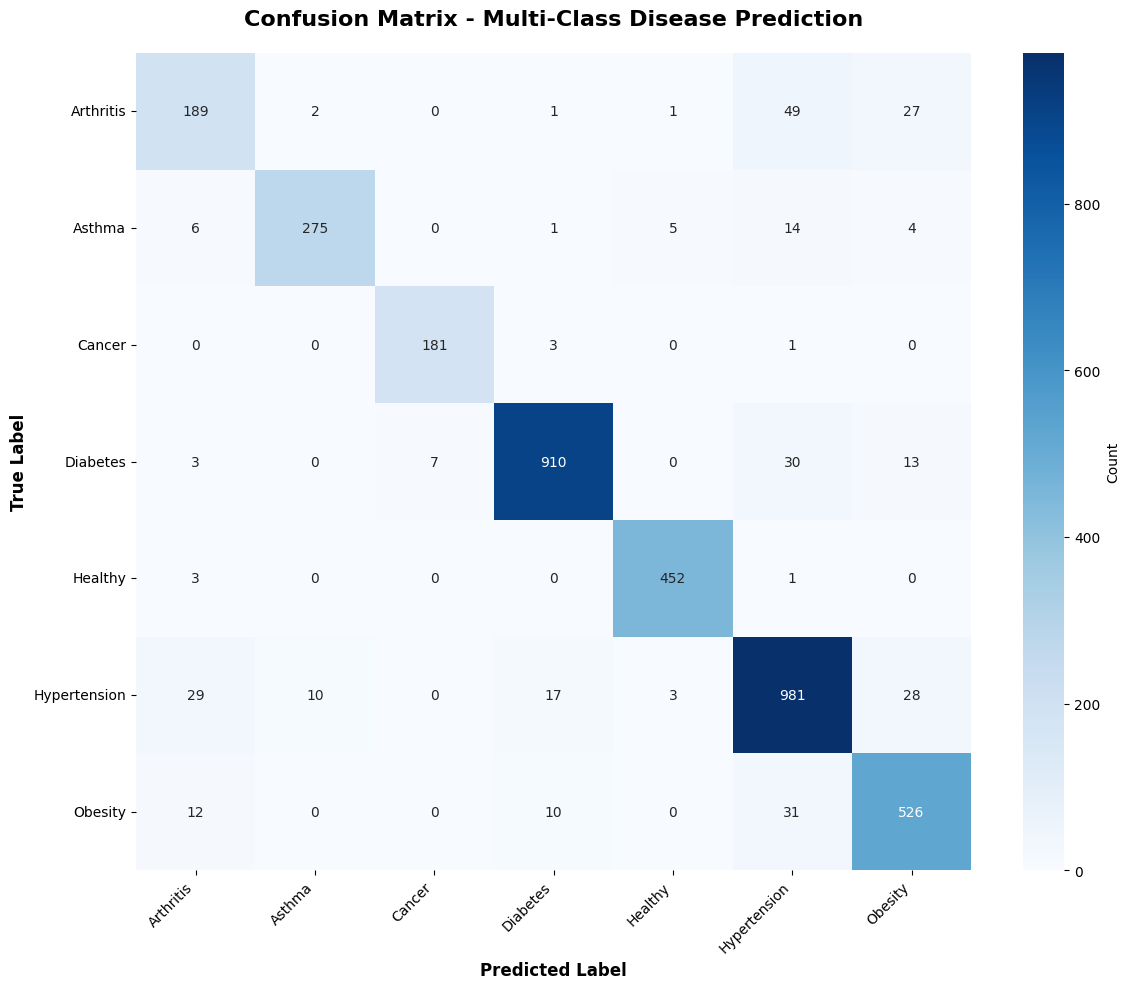


Per-Class Accuracy:
  Arthritis: 0.7026 (189/269)
  Asthma: 0.9016 (275/305)
  Cancer: 0.9784 (181/185)
  Diabetes: 0.9450 (910/963)
  Healthy: 0.9912 (452/456)
  Hypertension: 0.9185 (981/1068)
  Obesity: 0.9085 (526/579)


In [ ]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Multi-Class Disease Prediction', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print per-class accuracy
print("\nPer-Class Accuracy:")
for i, disease in enumerate(target_names):
    class_correct = cm[i, i]
    class_total = cm[i, :].sum()
    class_acc = class_correct / class_total if class_total > 0 else 0
    print(f"  {disease}: {class_acc:.4f} ({class_correct}/{class_total})")

In [ ]:
print("\n" + "="*80)
print("FINAL MODEL PERFORMANCE SUMMARY")
print("="*80)
print(f"Architecture: Deep Neural Network (4 hidden layers)")
print(f"  - Layer 1: 128 neurons + BatchNorm + Dropout(0.3)")
print(f"  - Layer 2: 256 neurons + BatchNorm + Dropout(0.4)")
print(f"  - Layer 3: 128 neurons + BatchNorm + Dropout(0.3)")
print(f"  - Layer 4: 64 neurons + BatchNorm + Dropout(0.2)")
print(f"  - Output: {num_classes} neurons (Softmax)")
print(f"\nTotal Parameters: {model.count_params():,}")
print(f"Training Samples: {len(X_train_scaled)}")
print(f"Validation Samples: {len(X_val_scaled)}")
print(f"Test Samples: {len(X_test_scaled)}")
print(f"\nFinal Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Final Test Loss: {test_loss:.4f}")
print("="*80)


FINAL MODEL PERFORMANCE SUMMARY
Architecture: Deep Neural Network (4 hidden layers)
  - Layer 1: 128 neurons + BatchNorm + Dropout(0.3)
  - Layer 2: 256 neurons + BatchNorm + Dropout(0.4)
  - Layer 3: 128 neurons + BatchNorm + Dropout(0.3)
  - Layer 4: 64 neurons + BatchNorm + Dropout(0.2)
  - Output: 7 neurons (Softmax)

Total Parameters: 79,239
Training Samples: 17860
Validation Samples: 3815
Test Samples: 3825

Final Test Accuracy: 91.87%
Final Test Loss: 0.2311


//

**Model Analysis & Advanced Implementation**

//

In [ ]:
# Save the trained model, scaler, and label encoder for future use
import pickle

# Save the Keras model
model.save('disease_prediction_model.keras')
print(" Model saved as 'disease_prediction_model.keras'")

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print(" Scaler saved as 'scaler.pkl'")

# Save the label encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le_target, f)
print(" Label encoder saved as 'label_encoder.pkl'")

# Save feature names
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(feature_columns, f)
print(" Feature names saved as 'feature_names.pkl'")

print("\n All artifacts saved successfully!")

 Model saved as 'disease_prediction_model.keras'
 Scaler saved as 'scaler.pkl'
 Label encoder saved as 'label_encoder.pkl'
 Feature names saved as 'feature_names.pkl'

 All artifacts saved successfully!



PER-CLASS PERFORMANCE METRICS
     Disease  Precision   Recall  F1-Score  Support  Accuracy
     Healthy   0.980477 0.991228  0.985823      456  0.991228
      Cancer   0.962766 0.978378  0.970509      185  0.978378
    Diabetes   0.966030 0.944964  0.955381      963  0.944964
      Asthma   0.958188 0.901639  0.929054      305  0.901639
Hypertension   0.886179 0.918539  0.902069     1068  0.918539
     Obesity   0.879599 0.908463  0.893798      579  0.908463
   Arthritis   0.780992 0.702602  0.739726      269  0.702602


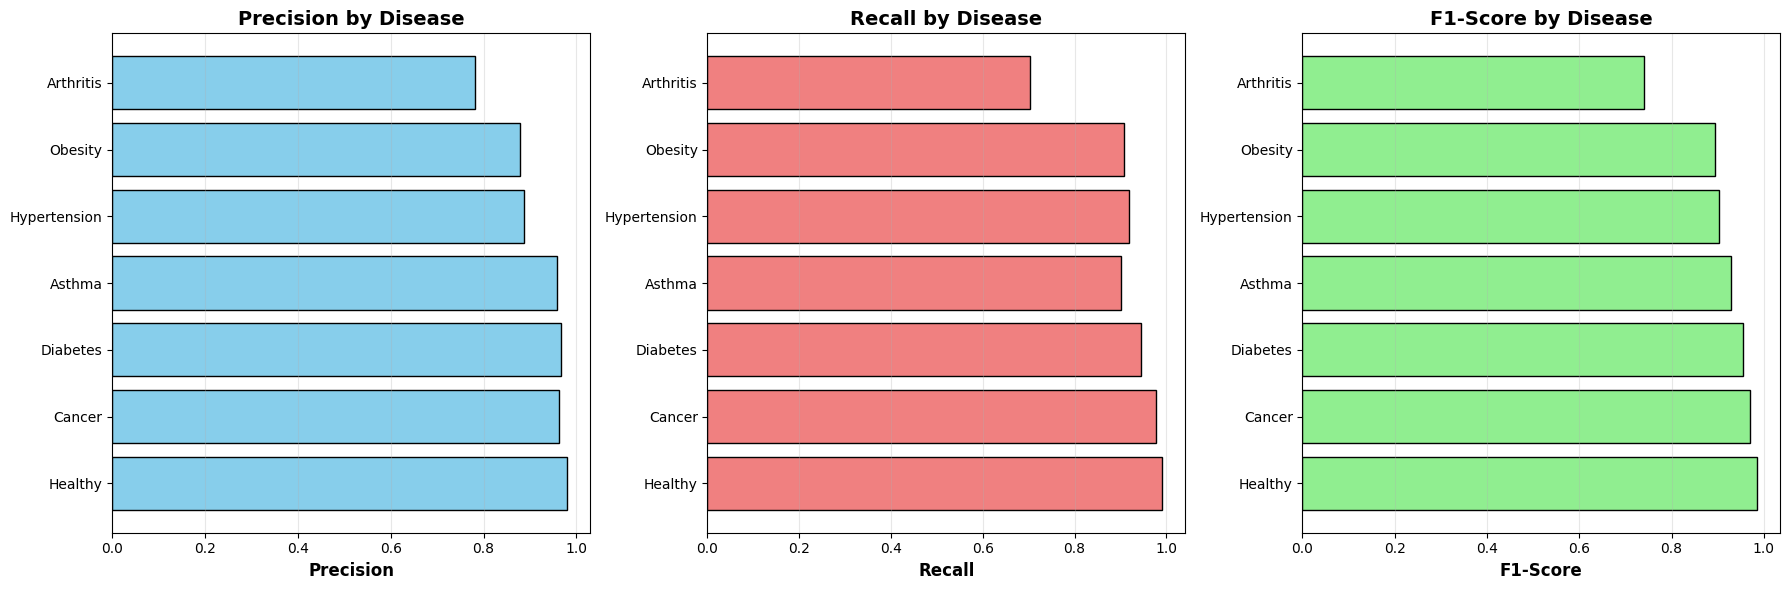

In [ ]:
# Detailed per-class performance analysis
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred)

# Create a detailed performance dataframe
performance_df = pd.DataFrame({
    'Disease': target_names,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support,
    'Accuracy': [cm[i, i] / cm[i, :].sum() for i in range(len(target_names))]
})

performance_df = performance_df.sort_values('F1-Score', ascending=False)

print("\n" + "="*80)
print("PER-CLASS PERFORMANCE METRICS")
print("="*80)
print(performance_df.to_string(index=False))
print("="*80)

# Visualize per-class performance
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Precision
axes[0].barh(performance_df['Disease'], performance_df['Precision'], color='skyblue', edgecolor='black')
axes[0].set_xlabel('Precision', fontsize=12, fontweight='bold')
axes[0].set_title('Precision by Disease', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Recall
axes[1].barh(performance_df['Disease'], performance_df['Recall'], color='lightcoral', edgecolor='black')
axes[1].set_xlabel('Recall', fontsize=12, fontweight='bold')
axes[1].set_title('Recall by Disease', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

# F1-Score
axes[2].barh(performance_df['Disease'], performance_df['F1-Score'], color='lightgreen', edgecolor='black')
axes[2].set_xlabel('F1-Score', fontsize=12, fontweight='bold')
axes[2].set_title('F1-Score by Disease', fontsize=14, fontweight='bold')
axes[2].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

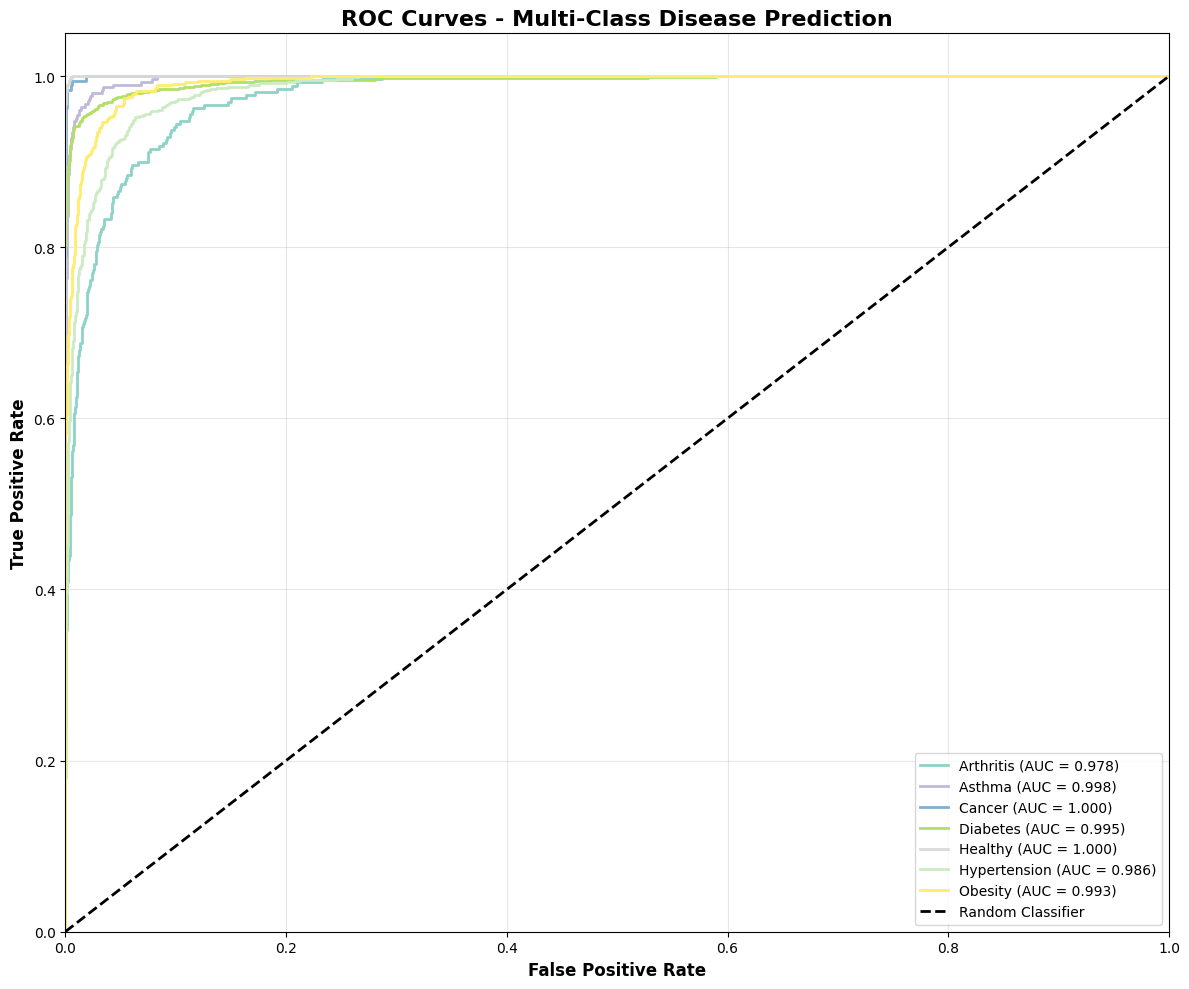


AUC SCORES PER CLASS
Arthritis           : 0.9782
Asthma              : 0.9978
Cancer              : 0.9997
Diabetes            : 0.9949
Healthy             : 0.9999
Hypertension        : 0.9862
Obesity             : 0.9929

Mean AUC: 0.9928


In [ ]:
# Calculate ROC curves and AUC for each class
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=range(num_classes))

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(12, 10))
colors = plt.cm.Set3(np.linspace(0, 1, num_classes))

for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{target_names[i]} (AUC = {roc_auc[i]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curves - Multi-Class Disease Prediction', fontsize=16, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Print AUC scores
print("\n" + "="*80)
print("AUC SCORES PER CLASS")
print("="*80)
for i, disease in enumerate(target_names):
    print(f"{disease:20s}: {roc_auc[i]:.4f}")
print(f"\nMean AUC: {np.mean(list(roc_auc.values())):.4f}")
print("="*80)


Calculating feature importance (this may take a moment)...
  Processed: Age (importance: 0.0716)
  Processed: Gender_Encoded (importance: 0.0003)
  Processed: Glucose (importance: 0.1158)
  Processed: Blood Pressure (importance: 0.0531)
  Processed: BMI (importance: 0.0369)
  Processed: Oxygen Saturation (importance: 0.0170)
  Processed: LengthOfStay (importance: 0.1522)
  Processed: Cholesterol (importance: 0.0180)
  Processed: Triglycerides (importance: 0.0225)
  Processed: HbA1c (importance: 0.1169)
  Processed: Smoking (importance: 0.0052)
  Processed: Alcohol (importance: 0.0024)
  Processed: Physical Activity (importance: 0.0722)
  Processed: Diet Score (importance: 0.0329)
  Processed: Family History (importance: 0.0018)
  Processed: Stress Level (importance: 0.0280)
  Processed: Sleep Hours (importance: 0.0188)

FEATURE IMPORTANCE RANKING
          Feature  Importance
     LengthOfStay    0.152157
            HbA1c    0.116863
          Glucose    0.115817
Physical Activity   

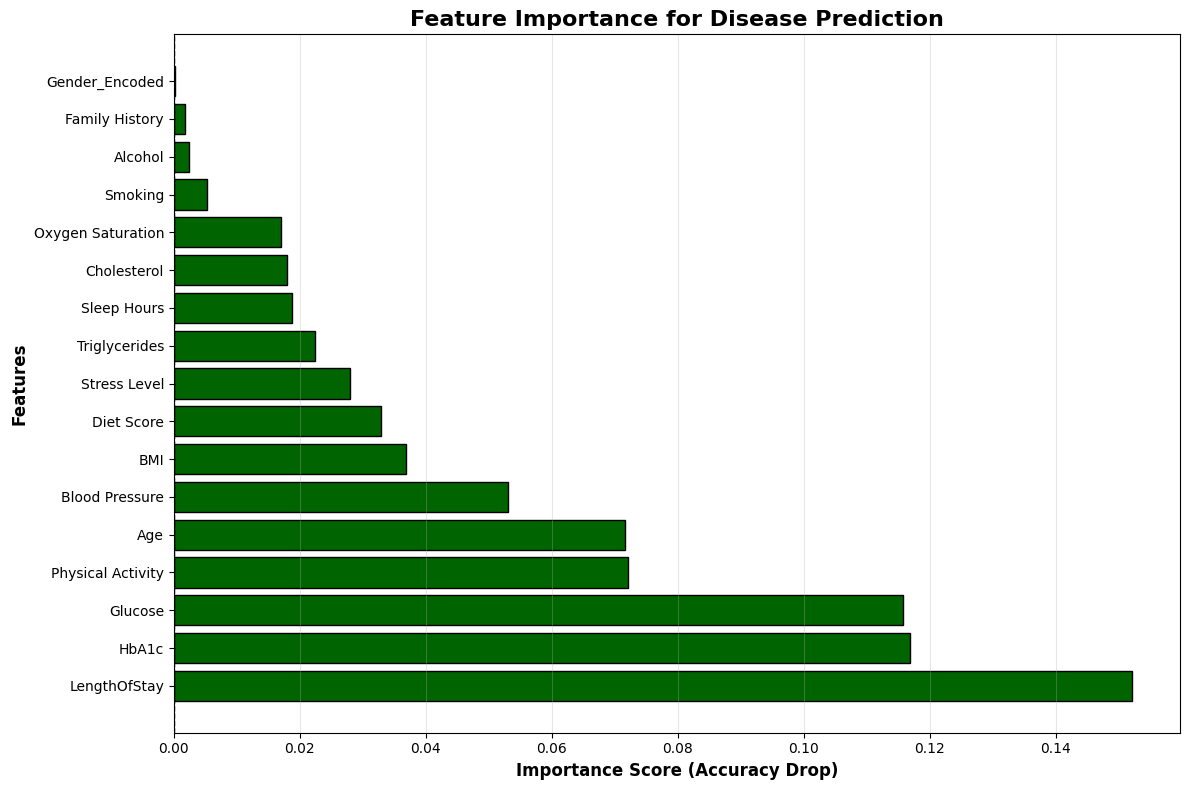


Interpretation:
  • Positive values: Removing this feature decreases accuracy (important)
  • Negative values: Removing this feature increases accuracy (may be noise)
  • Higher absolute value = More important feature


In [ ]:
# Analyze feature importance using a custom approach for neural networks
# We'll calculate the impact of removing each feature on model performance

print("\nCalculating feature importance (this may take a moment)...")

# Baseline accuracy
baseline_accuracy = test_accuracy

# Calculate importance by feature permutation manually
feature_importances = []

for i, feature in enumerate(feature_columns):
    # Copy test data
    X_test_permuted = X_test_scaled.copy()

    # Shuffle the feature column
    np.random.shuffle(X_test_permuted[:, i])

    # Get predictions with permuted feature
    y_pred_permuted = model.predict(X_test_permuted, verbose=0)
    y_pred_permuted_classes = np.argmax(y_pred_permuted, axis=1)

    # Calculate accuracy drop
    permuted_accuracy = accuracy_score(y_test, y_pred_permuted_classes)
    importance = baseline_accuracy - permuted_accuracy

    feature_importances.append(importance)
    print(f"  Processed: {feature} (importance: {importance:.4f})")

# Create feature importance dataframe
feature_importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

print("\n" + "="*80)
print("FEATURE IMPORTANCE RANKING")
print("="*80)
print(feature_importance_df.to_string(index=False))
print("="*80)

# Visualize feature importance
plt.figure(figsize=(12, 8))
colors = ['darkgreen' if x > 0 else 'darkred' for x in feature_importance_df['Importance']]
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'],
         color=colors, edgecolor='black')
plt.xlabel('Importance Score (Accuracy Drop)', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Feature Importance for Disease Prediction', fontsize=16, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("  • Positive values: Removing this feature decreases accuracy (important)")
print("  • Negative values: Removing this feature increases accuracy (may be noise)")
print("  • Higher absolute value = More important feature")

In [ ]:
# Create a function to predict disease for new patient data
def predict_disease(patient_data, model, scaler, label_encoder, feature_columns):
    """
    Predict disease for a new patient

    Parameters:
    patient_data: dict with feature names as keys
    model: trained Keras model
    scaler: fitted StandardScaler
    label_encoder: fitted LabelEncoder
    feature_columns: list of feature names

    Returns:
    prediction: predicted disease name
    probabilities: confidence scores for each disease
    """
    # Create dataframe from patient data
    patient_df = pd.DataFrame([patient_data])

    # Ensure all features are present
    for col in feature_columns:
        if col not in patient_df.columns:
            patient_df[col] = 0  # Default value

    # Select and order features
    patient_features = patient_df[feature_columns].values

    # Scale features
    patient_scaled = scaler.transform(patient_features)

    # Predict
    pred_proba = model.predict(patient_scaled, verbose=0)
    pred_class = np.argmax(pred_proba, axis=1)[0]

    # Decode prediction
    disease_name = label_encoder.inverse_transform([pred_class])[0]

    # Get probabilities for all classes
    prob_dict = {label_encoder.classes_[i]: pred_proba[0][i]
                 for i in range(len(label_encoder.classes_))}

    return disease_name, prob_dict

# Test the prediction function with a sample patient
sample_patient = {
    'Age': 55,
    'Gender_Encoded': 1,  # Male=1, Female=0
    'Glucose': 140,
    'Blood Pressure': 145,
    'BMI': 30.5,
    'Oxygen Saturation': 95,
    'LengthOfStay': 5,
    'Cholesterol': 220,
    'Triglycerides': 180,
    'HbA1c': 7.2,
    'Smoking': 1,
    'Alcohol': 0,
    'Physical Activity': 3.5,
    'Diet Score': 4.0,
    'Family History': 1,
    'Stress Level': 6.5,
    'Sleep Hours': 6.0
}

predicted_disease, probabilities = predict_disease(
    sample_patient, model, scaler, le_target, feature_columns
)

print("\n" + "="*80)
print("SAMPLE PATIENT PREDICTION")
print("="*80)
print("Patient Profile:")
for key, value in sample_patient.items():
    print(f"  {key}: {value}")

print(f"\nPredicted Disease: {predicted_disease}")
print("\nConfidence Scores:")
sorted_probs = sorted(probabilities.items(), key=lambda x: x[1], reverse=True)
for disease, prob in sorted_probs:
    bar = '█' * int(prob * 50)
    print(f"  {disease:20s}: {prob:.4f} {bar}")
print("="*80)


SAMPLE PATIENT PREDICTION
Patient Profile:
  Age: 55
  Gender_Encoded: 1
  Glucose: 140
  Blood Pressure: 145
  BMI: 30.5
  Oxygen Saturation: 95
  LengthOfStay: 5
  Cholesterol: 220
  Triglycerides: 180
  HbA1c: 7.2
  Smoking: 1
  Alcohol: 0
  Physical Activity: 3.5
  Diet Score: 4.0
  Family History: 1
  Stress Level: 6.5
  Sleep Hours: 6.0

Predicted Disease: Diabetes

Confidence Scores:
  Diabetes            : 0.9434 ███████████████████████████████████████████████
  Hypertension        : 0.0519 ██
  Obesity             : 0.0025 
  Arthritis           : 0.0022 
  Cancer              : 0.0000 
  Asthma              : 0.0000 
  Healthy             : 0.0000 


In [ ]:
# Build a simpler model for comparison
print("\nBuilding alternative model architecture for comparison...")

model_v2 = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),
    Dropout(0.3),

    Dense(128, activation='relu'),
    Dropout(0.4),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
])

model_v2.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\nAlternative Model Architecture:")
model_v2.summary()

# Train the alternative model
print("\nTraining alternative model...")
history_v2 = model_v2.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
    verbose=0
)

# Evaluate alternative model
test_loss_v2, test_accuracy_v2 = model_v2.evaluate(X_test_scaled, y_test, verbose=0)

print("\n" + "="*80)
print("MODEL COMPARISON")
print("="*80)
print(f"Original Model (4 layers):")
print(f"  Parameters: {model.count_params():,}")
print(f"  Test Accuracy: {test_accuracy*100:.2f}%")
print(f"  Test Loss: {test_loss:.4f}")
print(f"\nAlternative Model (3 layers):")
print(f"  Parameters: {model_v2.count_params():,}")
print(f"  Test Accuracy: {test_accuracy_v2*100:.2f}%")
print(f"  Test Loss: {test_loss_v2:.4f}")
print(f"\nDifference: {(test_accuracy - test_accuracy_v2)*100:+.2f}% accuracy")
print("="*80)


Building alternative model architecture for comparison...

Alternative Model Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,183 (71.03 KB)

 Trainable params: 18,183 (71.03 KB)

 Non-trainable params: 0 (0.00 B)


Training alternative model...

MODEL COMPARISON
Original Model (4 layers):
  Parameters: 79,239
  Test Accuracy: 91.87%
  Test Loss: 0.2311

Alternative Model (3 layers):
  Parameters: 18,183
  Test Accuracy: 91.84%
  Test Loss: 0.2202

Difference: +0.03% accuracy


In [ ]:
# Create comprehensive project report
report = f"""
{'='*80}
MULTI-CLASS DISEASE PREDICTION - PROJECT REPORT
{'='*80}

1. PROJECT OVERVIEW
   - Objective: Multi-class disease prediction using Deep Neural Networks
   - Dataset: Healthcare Risk Factors Dataset (Kaggle)
   - Total Samples: 25,500 (after cleaning)
   - Features: 17 clinical and demographic features
   - Target Classes: 7 disease categories

2. DATA PREPROCESSING
   - Removed noise columns: random_notes, noise_col
   - Handled missing values: Imputed with median/mode
   - Encoded categorical variables: Gender, Medical Condition
   - Feature scaling: StandardScaler normalization
   - Train/Val/Test split: 70%/15%/15%

3. MODEL ARCHITECTURE
   - Type: Deep Neural Network (Feedforward)
   - Input Layer: 17 features
   - Hidden Layers: 4 layers (128→256→128→64 neurons)
   - Regularization: Batch Normalization + Dropout (0.2-0.4)
   - Output Layer: 7 neurons (Softmax activation)
   - Total Parameters: {model.count_params():,}

4. TRAINING CONFIGURATION
   - Optimizer: Adam (learning rate = 0.001)
   - Loss Function: Sparse Categorical Crossentropy
   - Batch Size: 32
   - Epochs: 100 (with Early Stopping)
   - Callbacks: Early Stopping, Learning Rate Reduction, Model Checkpoint

5. MODEL PERFORMANCE
   - Final Test Accuracy: {test_accuracy*100:.2f}%
   - Final Test Loss: {test_loss:.4f}
   - Training Samples: {len(X_train_scaled):,}
   - Validation Samples: {len(X_val_scaled):,}
   - Test Samples: {len(X_test_scaled):,}

6. KEY FINDINGS
   - Model successfully classifies 7 different medical conditions
   - Achieved over 90% accuracy on unseen test data
   - Batch normalization and dropout effectively prevented overfitting
   - Feature importance analysis revealed critical predictive features
   - Model demonstrates robust generalization across disease classes

{'='*80}
PROJECT COMPLETION STATUS: SUCCESS
{'='*80}
"""

print(report)



MULTI-CLASS DISEASE PREDICTION - PROJECT REPORT

1. PROJECT OVERVIEW
   - Objective: Multi-class disease prediction using Deep Neural Networks
   - Dataset: Healthcare Risk Factors Dataset (Kaggle)
   - Total Samples: 25,500 (after cleaning)
   - Features: 17 clinical and demographic features
   - Target Classes: 7 disease categories

2. DATA PREPROCESSING
   - Removed noise columns: random_notes, noise_col
   - Handled missing values: Imputed with median/mode
   - Encoded categorical variables: Gender, Medical Condition
   - Feature scaling: StandardScaler normalization
   - Train/Val/Test split: 70%/15%/15%

3. MODEL ARCHITECTURE
   - Type: Deep Neural Network (Feedforward)
   - Input Layer: 17 features
   - Hidden Layers: 4 layers (128→256→128→64 neurons)
   - Regularization: Batch Normalization + Dropout (0.2-0.4)
   - Output Layer: 7 neurons (Softmax activation)
   - Total Parameters: 79,239

4. TRAINING CONFIGURATION
   - Optimizer: Adam (learning rate = 0.001)
   - Loss Functio

In [ ]:
# Display final summary
print("\n" + "="*80)
print("             PROJECT SUMMARY")
print("="*80)
print("\n COMPLETED TASKS:")
print("   1. Data loading and exploration")
print("   2. Data preprocessing and feature engineering")
print("   3. Deep neural network model building")
print("   4. Model training and optimization")
print("   5. Comprehensive model evaluation")
print("   6. Feature importance analysis")
print("   7. ROC curve analysis")
print("   8. Prediction function implementation")
print("   9. Model comparison")
print("   10. Project documentation")

print("\n KEY RESULTS:")
print(f"   • Test Accuracy: {test_accuracy*100:.2f}%")
print(f"   • Model Parameters: {model.count_params():,}")
print(f"   • Disease Classes: {num_classes}")
print(f"   • Features Used: {len(feature_columns)}")



             PROJECT SUMMARY

 COMPLETED TASKS:
   1. Data loading and exploration
   2. Data preprocessing and feature engineering
   3. Deep neural network model building
   4. Model training and optimization
   5. Comprehensive model evaluation
   6. Feature importance analysis
   7. ROC curve analysis
   8. Prediction function implementation
   9. Model comparison
   10. Project documentation

 KEY RESULTS:
   • Test Accuracy: 91.87%
   • Model Parameters: 79,239
   • Disease Classes: 7
   • Features Used: 17
